# Загрузка зависимостей

In [22]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Генерация выборки

In [23]:
n = 10
values = np.arange(5, 11)
probabilities = np.repeat(1/6, 6)  
discrete_uniform = stats.rv_discrete(values=(values, probabilities))
discrete_uniform = discrete_uniform.rvs(size=n)

print("Случайная выборка:")
print(discrete_uniform)

Случайная выборка:
[ 5  9  5  8 10 10  6 10 10  5]


# Построение дискретного вариационного ряда

In [24]:
sample_sorted = np.sort(discrete_uniform)

unique_values, value_counts = np.unique(sample_sorted, return_counts=True)

unique_values, value_counts = np.unique(sample_sorted, return_counts=True)
for value in range(5, 11):
    if value not in unique_values:
        unique_values = np.insert(unique_values, np.searchsorted(unique_values, value), value)
        value_counts = np.insert(value_counts, np.searchsorted(unique_values, value), 0)
variation_series = []
cumulative_frequency = 0
for value, count in zip(unique_values, value_counts):
    cumulative_frequency += count
    variation_series.append((value, count, cumulative_frequency))

# Вывод дискретного вариационного ряда
for item in variation_series:
    print(f"Value: {item[0]}, Frequency: {item[1]}, Cumulative Frequency: {item[2]}")

Value: 5, Frequency: 3, Cumulative Frequency: 3
Value: 6, Frequency: 1, Cumulative Frequency: 4
Value: 7, Frequency: 0, Cumulative Frequency: 4
Value: 8, Frequency: 1, Cumulative Frequency: 5
Value: 9, Frequency: 1, Cumulative Frequency: 6
Value: 10, Frequency: 4, Cumulative Frequency: 10


# Вычисление основных характеристик

In [25]:
repeated_values = np.repeat(unique_values, value_counts)
mean = np.mean(repeated_values)
print("среднее: %.3f" % (mean))
median = np.median(repeated_values)
print("медиана: %.3f" % (median))
mode = stats.mode(repeated_values)
print("мода:", (mode[0]))
variance = np.var(repeated_values)
print("дисперсия: %.3f" % (variance))
deviation = np.std(repeated_values)
print("ср. кв. отклонение: %.3f" % (deviation))
skew = stats.skew(repeated_values)
print("коэф. асимметрии: %.3f" % (skew))
excess = stats.kurtosis(repeated_values)
print("эксцесса: %.3f" % (excess))
variation = deviation / mean * 100
print("коэффициент вариации: %.3f" % (variation) +"%")
cumulative_frequencies = np.cumsum(value_counts)

среднее: 7.800
медиана: 8.500
мода: [10]
дисперсия: 4.760
ср. кв. отклонение: 2.182
коэф. асимметрии: -0.263
эксцесса: -1.717
коэффициент вариации: 27.971%


/tmp/ipykernel_3119/1725556748.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(repeated_values)


# Полигон распределения абсолютных частот вариационного ряда

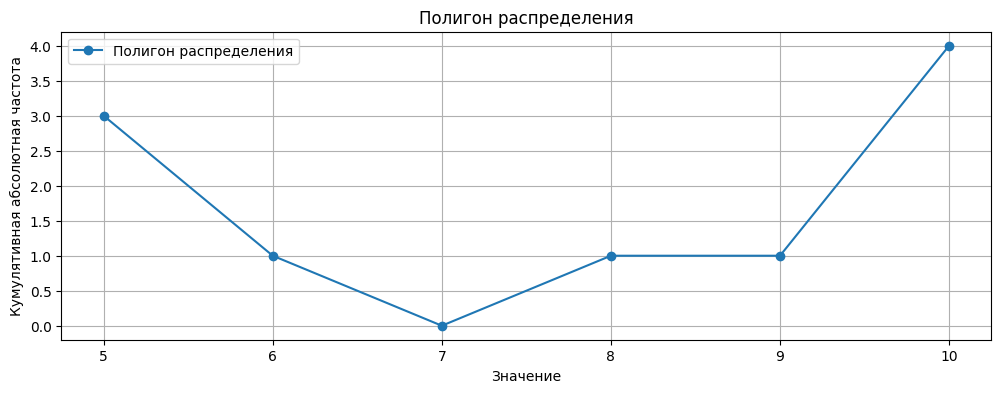

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(unique_values, value_counts, marker='o', linestyle='-', label='Полигон распределения')
plt.xlabel('Значение')
plt.ylabel('Кумулятивная абсолютная частота')
plt.title('Полигон распределения')
plt.legend()
plt.grid(True)
plt.show()

# Гистограмма абсолютных частот вариационного  ряда

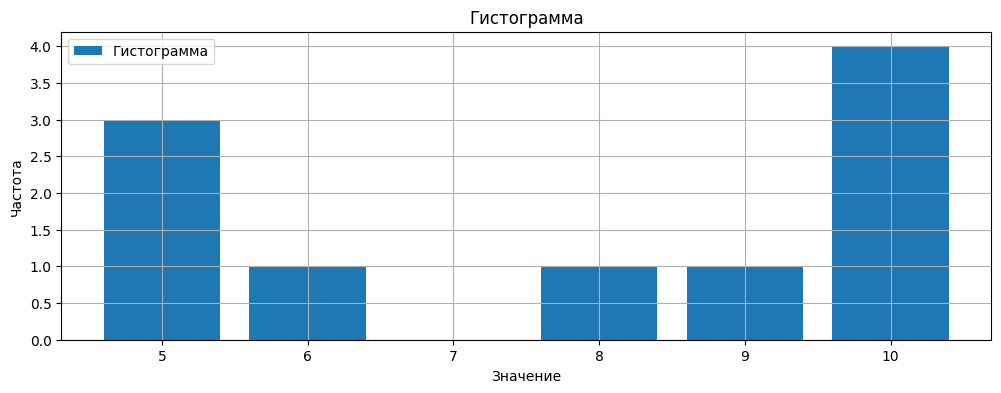

In [27]:
plt.figure(figsize=(12, 4))
plt.bar(unique_values, value_counts, width=0.8, align='center', label='Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.legend()
plt.grid(True)
plt.show()

# Построение кумулятивных абсолютных частот

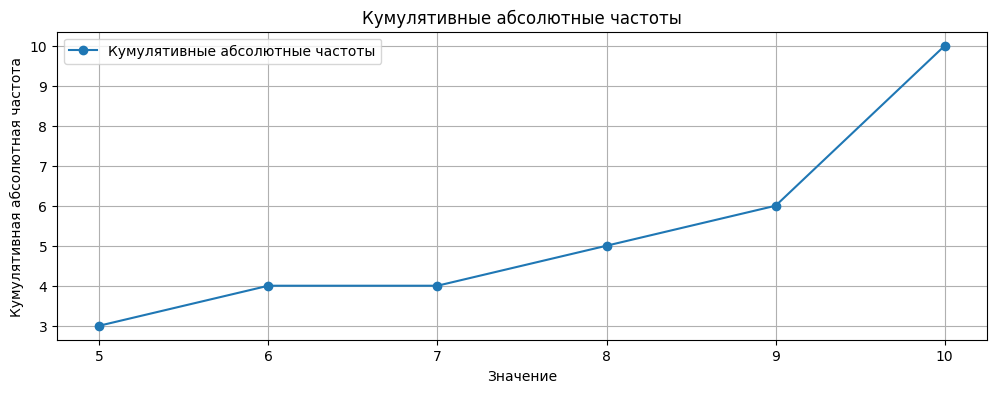

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(unique_values, cumulative_frequencies, marker='o', linestyle='-', label='Кумулятивные абсолютные частоты')
plt.xlabel('Значение')
plt.ylabel('Кумулятивная абсолютная частота')
plt.title('Кумулятивные абсолютные частоты')
plt.legend()
plt.grid(True)
plt.show()